<img width=150 src="https://upload.wikimedia.org/wikipedia/commons/thumb/1/1a/NumPy_logo.svg/200px-NumPy_logo.svg.png"></img>

* 目標：
  * pandas 結合 matplotlib 的實際應用
  * 如何使用Pandas 處理資料集，並加以視覺化效果
* 重點：資料整理與視覺化可以加速理解機器學習

In [1]:
# 載入相關的程式庫
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [ ]:
# 需要使用 Colab 請注意一下
# 先行確認 Colab 上面的版本
import keras
print('keras:', keras.__version__)
import tensorflow as tf
print('tf:', tf.__version__)

## 新增網路硬碟

### 需要使用 Colab 請注意以下，先行確認 Colab 上面的版本：

In [ ]:
## 需要使用 Colab 請注意一下
# Training code
from google.colab import drive
drive.mount('/gdrive', force_remount=True)
#drive.mount('/gdrive')
import os
os.getcwd()

In [ ]:
#設定Google Drive路徑
root = '/gdrive'
path = '/gdrive/My Drive/Colab Notebooks/Project/Data_Science_Marathon'
os.chdir(path)
os.getcwd()

In [ ]:
### 利用 PANDAS 取得酒的品質資料 
df_red = pd.read_csv('winequality_red.csv', sep = ';')
df_white = pd.read_csv('winequality_white.csv', sep = ';')

* 檢查資料

In [5]:
# 檢查數據
df_white.info(),df_red.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column        

(None, None)

* 是否有重複列

In [6]:
# 檢查重複數據
df_white.duplicated().sum(),df_red.duplicated().sum()

(937, 240)

* 移除重複列

In [ ]:
df_white.drop_duplicates(inplace = True)
df_red.drop_duplicates(inplace = True)

* 是否遺失值
  * 第一個 .sum() 意思是每一列的數值加起來，第二個是全部加起來後產生出的一個 Series，再全部加起來

In [8]:
# 檢查遺失值
df_red.isnull().sum().sum(), df_white.isnull().sum().sum()

(0, 0)

In [ ]:
#資料整理
df_red['color'] = 'R'
df_white['color'] = 'W'

* 整合

In [ ]:
# 整合紅酒與白酒的資料
df_all = pd.concat([df_red, df_white], axis=0)

# 檢查合併後的資料集
df_all.head()

In [ ]:
df_all.rename(columns={'fixed acidity': 'fixed_acidity', 'citric acid': 'citric_acid',
                       'volatile acidity': 'volatile_acidity', 'residual sugar': 'residual_sugar',
                       'free sulfur dioxide': 'free_sulfur_dioxide',
                       'total sulfur dioxide': 'total_sulfur_dioxide'}, inplace=True)
# 檢查合併後的資料集
df_all.head()

In [ ]:
# 另法
df_wine = df_red.append(df_white)
df_wine.to_csv('winequality.csv', index=False)

* 處理缺失值

In [ ]:
df = pd.get_dummies(df_all, columns=['color'])
df_all.isnull().sum()

In [ ]:
#可以使用 info() 方法瞭解有關資料集屬性的更多資訊。特別是行和列的數量、列名稱、它們的數據類型和空值數。
df_all.info()

In [ ]:
#要瞭解數據集的統計摘要，即記錄數、平均值、標準差、最小值和最大值,我們使用描述()。
df_all.describe()

## 視覺化

* 條形圖 (Bar plot)：條形圖也可稱為柱狀圖，通常用在數值的顯示或者比較
* 直方圖 (Hist plot)：用於頻率分佈，y 軸表示頻率分佈 (數值或者比率)，hist 函數柱體個數預設 bins=10，且預設圖中會有網格線
  * pad：用於設置繪圖區邊緣與畫布邊緣的距離大小
  * w_pad：用於設置繪圖區間水平距離的大小
  * h_pad：用於設置繪圖區間垂直距離的大小
* 散點圖：能夠顯示 2 個維度上每組數據的值。可以顯示觀察數據分布情形，描述數據的相關性
* 核密度圖：顯示數值變量的分佈，它非常類似於直方圖
* 熱力圖：以顏色變化來顯示數據的矩陣，不過在這裡以離散型的為主，其中兩個元素之間的關係量級由色調表示
* 聯合圖：此圖採用兩個變量或單變量，並同時創建不同圖形在畫紙上
* 小提琴圖：用來展示資料 (多組) 的分布情形，可以說是箱型圖加上密度圖的結合
* 箱型圖：繪製強大趨勢
* 帶狀圖：繪製強大趨勢

### 直方圖

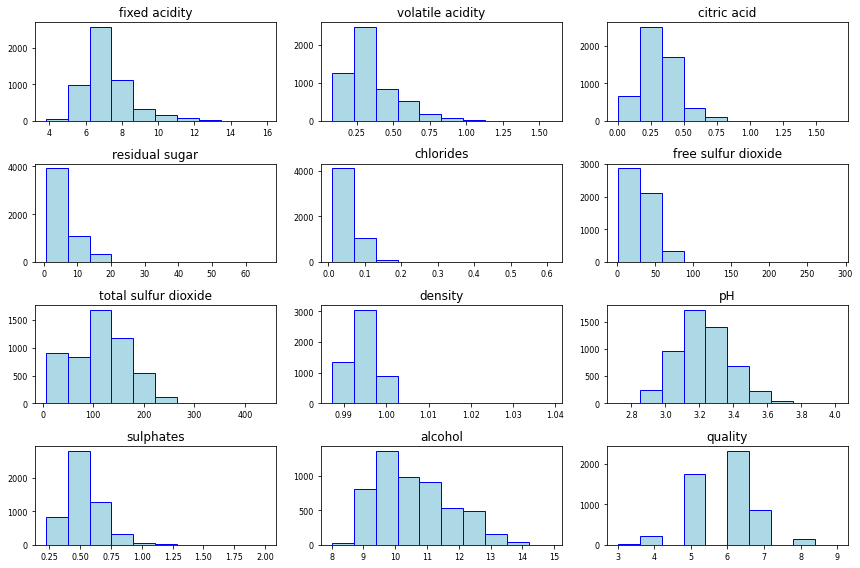

In [14]:
# 直方圖
df_wine.hist(bins=10, color='lightblue',edgecolor='blue',xlabelsize=8, ylabelsize=8, grid=False)

plt.tight_layout(rect=(1,1,3,3))

### 熱力圖

* 熱圖是顯示兩個要素之間的關係量級由色調表示
* 熱圖中的梯度根據屬性之間的相關性強度而變化。在下面的示例中，高度相關的屬性的陰影比其餘屬性暗

In [ ]:
#Plotting heatmap
f, ax = plt.subplots(figsize=(10, 6)) #規範圖形大小
b = sns.heatmap(df_all.corr(), annot=True, linewidths=.05, ax=ax)
f.subplots_adjust(top=0.93)
bottom, top = ax.get_ylim() #設定圖形上, 底的label
ax.set_ylim(bottom + 0.5, top - 0.5)
title = f.suptitle('Correlation Heatmap for wine attributes', fontsize=12)

### 聯合圖

* 聯合圖用於顯示兩個變數之間的關係
* 可以選擇從 5 個選項中繪製的繪圖種類 - 散點、reg、十六進位、kde、resid。下面我展示了三個使用線性回歸線('reg'的例子)
  1. 第一個示例 "檸檬酸"(citric acid) 和 "固定酸度"(fixed acidity) 具有正相關關係，因此圖形是向上的
  2. 然而，"硫酸鹽"(chlorides) 和 "酒精"(alcohol)的變數是相關的。因此，線性回歸線幾乎是平的
  3. 具有 "揮發性酸度"(volatile acidity) 和 "檸檬酸"(citric acid) 屬性的示例具有負相關性，因此圖呈向下

C:\Users\YenLin\anaconda3\envs\TF_python3.7\lib\site-packages\numpy\linalg\linalg.py:1965: RuntimeWarning: invalid value encountered in greater
  large = s > cutoff
C:\Users\YenLin\anaconda3\envs\TF_python3.7\lib\site-packages\numpy\linalg\linalg.py:1965: RuntimeWarning: invalid value encountered in greater
  large = s > cutoff
C:\Users\YenLin\anaconda3\envs\TF_python3.7\lib\site-packages\numpy\linalg\linalg.py:1965: RuntimeWarning: invalid value encountered in greater
  large = s > cutoff


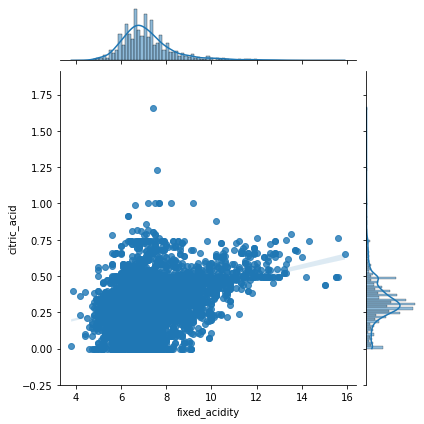

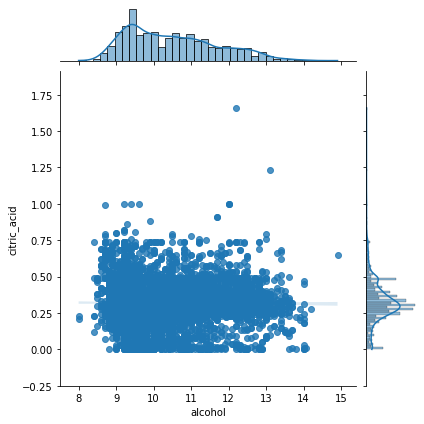

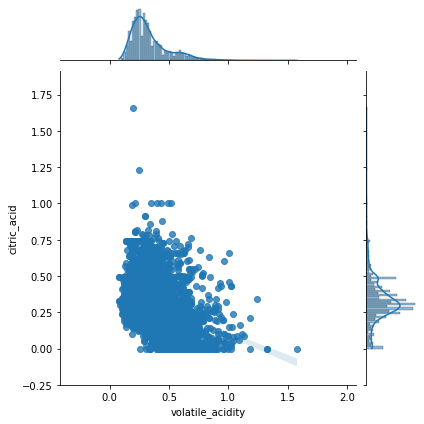

In [15]:
# Plotting Jointplot，使用 'reg'== regression 回歸線繪製關係圖。
  
a = sns.jointplot( x='fixed_acidity', y='citric_acid', data=df_all, kind='reg', 
                   xlim=[df_all.fixed_acidity.min()-0.5,df_all.fixed_acidity.max()+0.5], 
                   ylim=[df_all.citric_acid.min()-0.25,df_all.citric_acid.max()+0.25] )

b = sns.jointplot( x='alcohol', y='citric_acid', data=df_all, kind='reg', 
                   xlim=[df_all.alcohol.min()-0.5,df_all.alcohol.max()+0.5], 
                   ylim=[df_all.citric_acid.min()-0.25,df_all.citric_acid.max()+0.25] )

c = sns.jointplot( x='volatile_acidity', y='citric_acid', data=df_all, kind='reg', 
                   xlim=[df_all.volatile_acidity.min()-0.5,df_all.volatile_acidity.max()+0.5], 
                   ylim=[df_all.citric_acid.min()-0.25,df_all.citric_acid.max()+0.25] )

### 小提琴圖

In [ ]:
sns.violinplot(data=df_all, x="quality", y="sulphates")

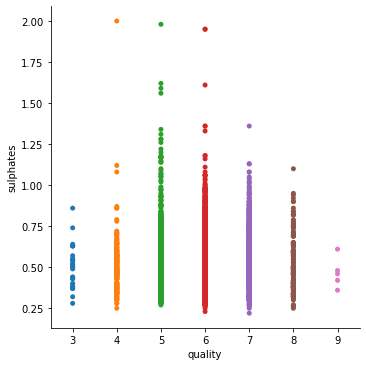

In [16]:
'''
Swarm 沿分類軸(質量)調整記錄。這種繪圖將記錄分別標，而不會重疊。這就是為什麼它最適合小型數據集的原因。
在此圖表中，您可以看到硫酸鹽的數量，根據品質。品質值為 6 的硫酸鹽密度最高，品質等級為 9 和 3 的最低。
'''

sns.catplot( x='quality', y='sulphates', data=df_all, jitter=False )

In [ ]:
sns.catplot(x='quality', y='pH', data=df_all, kind='swarm')